In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [63]:
import warnings
warnings.filterwarnings("ignore")

!pip install torchbearer --root-user-action=ignore


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import torch
import torchvision
import torchbearer
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.models import vgg16_bn
import numpy as np


In [65]:
# VGG16_bn on CIFAR10

class VGG16_bn(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16_bn, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.avgpool = nn.AvgPool2d(2)

        self.classifier = nn.Linear(512, num_classes)
        
        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, (nn.Linear, nn.Conv2d)):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

# Test the VGG16_bn model
model = VGG16_bn()
model


VGG16_bn(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128

In [66]:
'''def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight)
        # nn.init.xavier_normal(m.weight)
    elif isinstance(m, torch.nn.BatchNorm2d):
        m.weight.data = torch.rand(m.weight.data.shape)
        m.bias.data = torch.zeros_like(m.bias.data)

model = model.apply(init_weights)
'''

'def init_weights(m):\n    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):\n        nn.init.kaiming_normal_(m.weight)\n        # nn.init.xavier_normal(m.weight)\n    elif isinstance(m, torch.nn.BatchNorm2d):\n        m.weight.data = torch.rand(m.weight.data.shape)\n        m.bias.data = torch.zeros_like(m.bias.data)\n\nmodel = model.apply(init_weights)\n'

In [67]:
train_batch_size = 128
test_batch_size = 128

# convert each image to tensor format
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# load data
trainset = CIFAR10(root='.', train=True, download=True, transform=transform_train)
testset = CIFAR10(root='.', train=False, download=True, transform=transform_test)

trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True)
# validloader = DataLoader(valid_data, batch_size=train_batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=test_batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [68]:
sparse_ratio = 0.98


In [69]:
class Pruner:
    def __init__(self, masked_parameters):
        self.masked_parameters = list(masked_parameters)
        self.scores = {}

    def score(self, model, loss, dataloader, device):
        raise NotImplementedError

    def _global_mask(self, sparsity):
        r"""Updates masks of model with scores by sparsity level globally.
        """
        # # Set score for masked parameters to -inf 
        # for mask, param in self.masked_parameters:
        #     score = self.scores[id(param)]
        #     score[mask == 0.0] = -np.inf

        # Threshold scores
        global_scores = torch.cat([torch.flatten(v) for v in self.scores.values()])
        k = int((1.0 - sparsity) * global_scores.numel())
        if not k < 1:
            threshold, _ = torch.kthvalue(global_scores, k)
            for mask, param in self.masked_parameters:
                score = self.scores[id(param)] 
                zero = torch.tensor([0.]).to(mask.device)
                one = torch.tensor([1.]).to(mask.device)
                mask.copy_(torch.where(score <= threshold, zero, one))
    
    def _local_mask(self, sparsity):
        r"""Updates masks of model with scores by sparsity level parameter-wise.
        """
        for mask, param in self.masked_parameters:
            score = self.scores[id(param)]
            k = int((1.0 - sparsity) * score.numel())
            if not k < 1:
                threshold, _ = torch.kthvalue(torch.flatten(score), k)
                zero = torch.tensor([0.]).to(mask.device)
                one = torch.tensor([1.]).to(mask.device)
                mask.copy_(torch.where(score <= threshold, zero, one))

    def mask(self, sparsity, scope):
        r"""Updates masks of model with scores by sparsity according to scope.
        """
        if scope == 'global':
            self._global_mask(sparsity)
        if scope == 'local':
            self._local_mask(sparsity)

    @torch.no_grad()
    def apply_mask(self):
        r"""Applies mask to prunable parameters.
        """
        for mask, param in self.masked_parameters:
            param.mul_(mask)

    def alpha_mask(self, alpha):
        r"""Set all masks to alpha in model.
        """
        for mask, _ in self.masked_parameters:
            mask.fill_(alpha)

    # Based on https://github.com/facebookresearch/open_lth/blob/master/utils/tensor_utils.py#L43
    def shuffle(self):
        for mask, param in self.masked_parameters:
            shape = mask.shape
            perm = torch.randperm(mask.nelement())
            mask = mask.reshape(-1)[perm].reshape(shape)

    def invert(self):
        for v in self.scores.values():
            v.div_(v**2)

    def stats(self):
        r"""Returns remaining and total number of prunable parameters.
        """
        remaining_params, total_params = 0, 0 
        for mask, _ in self.masked_parameters:
             remaining_params += mask.detach().cpu().numpy().sum()
             total_params += mask.numel()
        return remaining_params, total_params


In [70]:
class SynFlow(Pruner):
    def __init__(self, masked_parameters):
        super(SynFlow, self).__init__(masked_parameters)

    def score(self, model, loss, dataloader, device):
      
        @torch.no_grad()
        def linearize(model):
            # model.double()
            signs = {}
            for name, param in model.state_dict().items():
                signs[name] = torch.sign(param)
                param.abs_()
            return signs

        @torch.no_grad()
        def nonlinearize(model, signs):
            # model.float()
            for name, param in model.state_dict().items():
                param.mul_(signs[name])
        
        signs = linearize(model)

        (data, _) = next(iter(dataloader))
        input_dim = list(data[0,:].shape)
        input = torch.ones([1] + input_dim)#.to(device)#, dtype=torch.float64).to(device)
        output = model(input)
        torch.sum(output).backward()
        
        for _, p in self.masked_parameters:
            self.scores[id(p)] = torch.clone(p.grad * p).detach().abs_()
            p.grad.data.zero_()

        nonlinearize(model, signs)


In [71]:
def prune_loop(model, loss, pruner, dataloader, device, sparsity, schedule, scope, epochs,
               reinitialize=False, train_mode=False, shuffle=False, invert=False):
    r"""Applies score mask loop iteratively to a final sparsity level.
    """
    # Set model to train or eval mode
    model.train()
    if not train_mode:
        model.eval()

    # Prune model
    for epoch in tqdm(range(epochs)):
        pruner.score(model, loss, dataloader, device)
        if schedule == 'exponential':
            sparse = sparsity**((epoch + 1) / epochs)
        elif schedule == 'linear':
            sparse = 1.0 - (1.0 - sparsity)*((epoch + 1) / epochs)
        # Invert scores
        if invert:
            pruner.invert()
        pruner.mask(sparse, scope)
    
    # Reainitialize weights
    if reinitialize:
        model._initialize_weights()

    # Shuffle masks
    if shuffle:
        pruner.shuffle()

    # Confirm sparsity level
    remaining_params, total_params = pruner.stats()
    if np.abs(remaining_params - total_params*sparsity) >= 5:
        print("ERROR: {} prunable parameters remaining, expected {}".format(remaining_params, total_params*sparsity))
        quit()


In [72]:
def masks(module):
    r"""Returns an iterator over modules masks, yielding the mask.
    """
    for name, buf in module.named_buffers():
        if "mask" in name:
            yield buf

def prunable(module, batchnorm, residual):
    r"""Returns boolean whether a module is prunable.
    """
    isprunable = isinstance(module, (nn.Linear, nn.Conv2d))
    if batchnorm:
        isprunable |= isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d))
    if residual:
        isprunable |= isinstance(module, (nn.Identity1d, nn.Identity2d))
    return isprunable

def masked_parameters(model, bias=False, batchnorm=False, residual=False):
    r"""Returns an iterator over models prunable parameters, yielding both the
    mask and parameter tensors.
    """
    for module in filter(lambda p: prunable(p, batchnorm, residual), model.modules()):
        for mask, param in zip(masks(module), module.parameters(recurse=False)):
            if param is not module.bias or bias is True:
                yield mask, param


In [73]:
from tqdm import tqdm

device = "cuda:0" if torch.cuda.is_available() else "cpu"

loss_fun = nn.CrossEntropyLoss()
prune_loop(model, loss_fun, SynFlow(masked_parameters(model, bias=True, batchnorm=True, residual=False)),
           trainloader, device, sparse_ratio, 'linear', 'local', 100, 
          reinitialize=False, train_mode=False, shuffle=True, invert=False)


100%|██████████| 100/100 [00:26<00:00,  3.79it/s]


In [74]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, test_loss):
  plt.plot(train_loss, label="Training data")
  plt.plot(test_loss, label="Validation data")
  plt.xlabel("Epochs", fontsize="18")
  plt.ylabel("Loss", fontsize="18")
  plt.tick_params(axis='both', which='major', labelsize=15)
  plt.legend(fontsize="15")
  plt.grid()
  plt.show();

def plot_acc(train_acc, test_acc):
  plt.plot(train_acc, label="Training data")
  plt.plot(test_acc, label="Validation data")
  plt.xlabel("Epochs", fontsize="18")
  plt.ylabel("Accuracy", fontsize="18")
  plt.tick_params(axis='both', which='major', labelsize=15)
  plt.legend(fontsize="15")
  plt.grid();
  

In [75]:
from torchbearer import Callback
from torchbearer import callbacks
from torchbearer.callbacks import MultiStepLR

@callbacks.on_end_epoch
def callback(state):
  try:
      train_loss[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['loss']
      train_acc[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['acc']
      test_loss[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['val_loss']
      test_acc[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['val_acc']
  except:
      pass


In [76]:
def train_model(model, epochs=80):
    model = model.to(device)
    loss_function = nn.CrossEntropyLoss()
    scheduler = callbacks.MultiStepLR(milestones=[40, 60], gamma=0.1)
    optimiser = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

    trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], callbacks=[callback, scheduler]).to(device)
    trial.with_generators(trainloader, test_generator=testloader, val_generator=testloader)
    trial.run(epochs)
    results = trial.evaluate(data_key=torchbearer.TEST_DATA)
    print(results)


In [77]:
num_epochs = 80

device = "cuda:0" if torch.cuda.is_available() else "cpu"

train_loss = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_loss = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)

train_model(model, epochs=num_epochs)


0/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

0/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

1/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

1/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

2/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

2/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

3/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

3/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

4/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

4/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

5/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

5/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

6/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

6/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

7/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

7/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

8/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

8/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

9/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

9/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

10/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

10/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

11/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

11/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

12/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

12/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

13/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

13/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

14/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

14/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

15/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

15/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

16/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

16/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

17/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

17/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

18/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

18/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

19/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

19/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

20/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

20/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

21/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

21/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

22/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

22/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

23/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

23/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

24/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

24/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

25/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

25/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

26/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

26/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

27/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

27/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

28/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

28/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

29/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

29/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

30/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

30/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

31/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

31/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

32/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

32/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

33/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

33/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

34/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

34/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

35/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

35/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

36/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

36/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

37/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

37/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

38/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

38/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

39/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

39/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

40/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

40/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

41/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

41/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

42/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

42/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

43/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

43/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

44/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

44/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

45/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

45/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

46/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

46/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

47/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

47/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

48/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

48/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

49/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

49/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

50/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

50/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

51/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

51/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

52/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

52/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

53/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

53/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

54/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

54/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

55/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

55/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

56/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

56/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

57/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

57/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

58/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

58/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

59/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

59/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

60/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

60/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

61/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

61/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

62/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

62/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

63/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

63/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

64/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

64/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

65/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

65/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

66/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

66/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

67/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

67/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

68/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

68/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

69/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

69/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

70/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

70/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

71/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

71/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

72/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

72/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

73/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

73/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

74/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

74/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

75/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

75/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

76/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

76/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

77/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

77/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

78/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

78/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

79/80(t):   0%|          | 0/391 [00:00<?, ?it/s]

79/80(v):   0%|          | 0/79 [00:00<?, ?it/s]

0/1(e):   0%|          | 0/79 [00:00<?, ?it/s]

{'test_loss': 0.3248726725578308, 'test_acc': 0.9286999702453613}


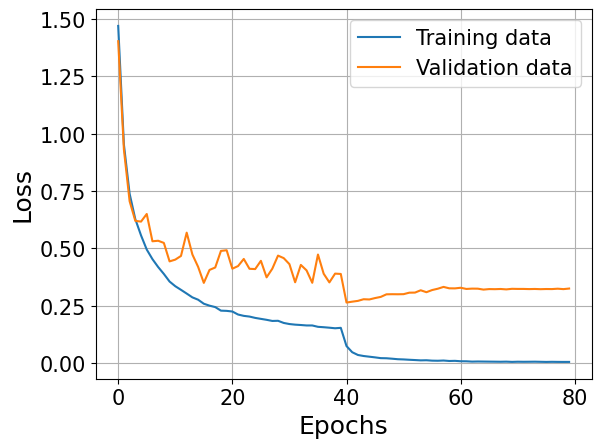

In [78]:
plot_loss(train_loss, test_loss)


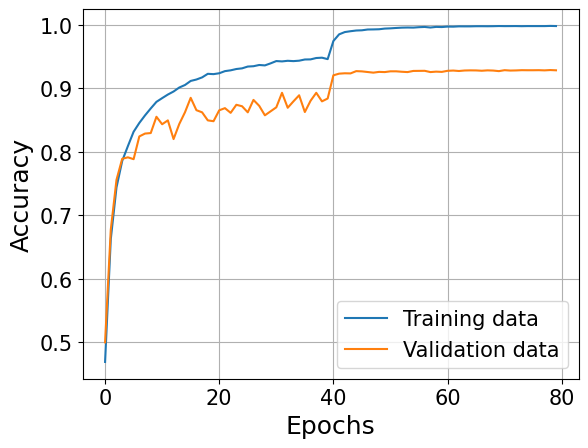

In [79]:
plot_acc(train_acc, test_acc)


In [80]:
test_acc.max()


0.929099977016449

In [81]:
torch.save(model.state_dict(), "./vgg16-98.weights")

from google.colab import files
files.download('vgg16-98.weights')
# 98 shuffle

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>